In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
vg_df = pd.read_csv("../bases/Video_Games_Sales_as_at_22_Dec_2016.csv")
vg_df = vg_df[vg_df["Platform"].isin(["Wii","X360",
                                      "XOne","PS","PS4","PS3","PS2"])]
vg_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [4]:
vg_df.shape

(7911, 16)

In [5]:
vg_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
vg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,7781.0,2007.053849,5.339748,1994.00,2003.00,2008.00,2011.00,2017.00
NA_Sales,7911.0,0.330563,0.886461,0.00,0.03,0.11,0.31,41.36
EU_Sales,7911.0,0.203367,0.618490,0.00,0.00,0.05,0.18,28.96
JP_Sales,7911.0,0.057807,0.214167,0.00,0.00,0.00,0.03,4.70
Other_Sales,7911.0,0.075525,0.251976,0.00,0.01,0.02,0.06,10.57
Global_Sales,7911.0,0.667321,1.749274,0.01,0.09,0.24,0.63,82.53
Critic_Score,4240.0,68.723821,14.345414,13.00,60.00,71.00,80.00,98.00
Critic_Count,4240.0,29.570519,20.348085,3.00,13.00,25.00,42.00,113.00
User_Count,4245.0,151.339223,491.895842,4.00,12.00,30.00,87.00,10179.00


In [7]:
vg_df.describe(include=["object"]).T

,count,unique,top,freq
Name,7911,5932,Skylanders: SuperChargers,5
Platform,7911,7,PS2,2161
Genre,7911,12,Action,1674
Publisher,7899,377,Electronic Arts,760
User_Score,5158,92,tbd,913
Developer,5202,1090,EA Sports,108
Rating,5136,6,E,1732


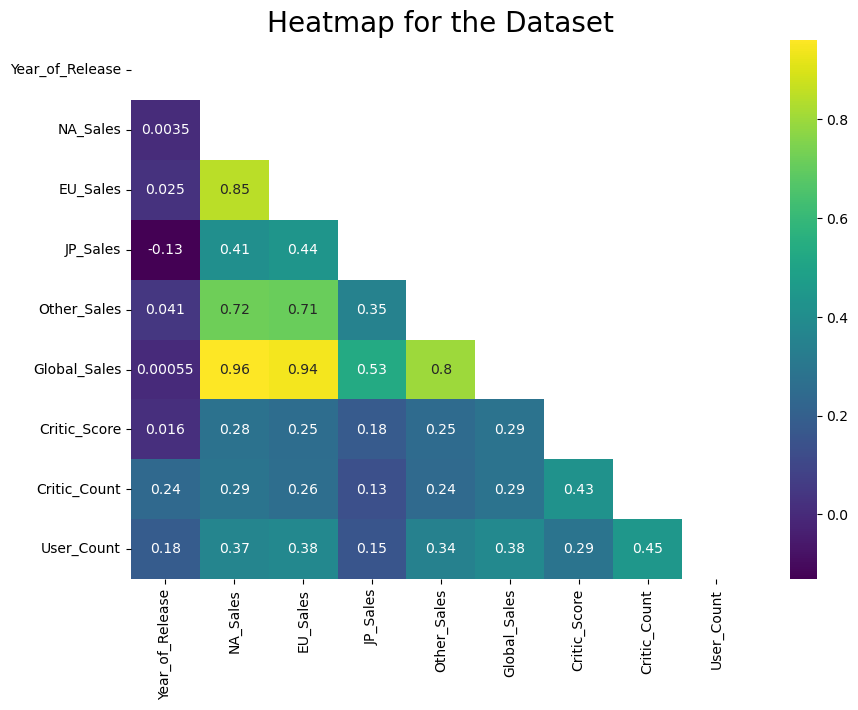

In [8]:
plt.rcParams['figure.figsize'] = (10, 7)

corr = vg_df.corr()
matrix = np.triu(corr)

sns.heatmap(corr, annot = True, cmap = "viridis", mask = matrix)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

# Freq abs

In [9]:
#Exemplo: Categórica vs. categórica
pd.crosstab(vg_df.Genre, vg_df.Platform)

Platform,PS,PS2,PS3,PS4,Wii,X360,XOne
Genre,,,,,,,
Action,157,348,380,144,237,323,85
Adventure,69,196,74,28,83,48,14
Fighting,108,150,76,18,42,65,7
Misc,76,222,125,20,280,127,19
Platform,64,103,37,12,58,25,5
Puzzle,32,18,3,1,55,7,0
Racing,145,216,92,19,93,104,20
Role-Playing,97,187,119,52,35,75,14
Shooter,96,160,156,41,65,203,38


In [10]:
# Freq rel

In [11]:
sumar1 = pd.crosstab(vg_df.Genre, vg_df.Platform, normalize=True)*100 
sumar1

Platform,PS,PS2,PS3,PS4,Wii,X360,XOne
Genre,,,,,,,
Action,1.984578,4.398938,4.803438,1.820250,2.995829,4.082923,1.074453
Adventure,0.872203,2.477563,0.935406,0.353938,1.049172,0.606750,0.176969
Fighting,1.365188,1.896094,0.960688,0.227531,0.530906,0.821641,0.088484
Misc,0.960688,2.806219,1.580078,0.252813,3.539376,1.605360,0.240172
Platform,0.809000,1.301985,0.467703,0.151688,0.733156,0.316016,0.063203
Puzzle,0.404500,0.227531,0.037922,0.012641,0.695234,0.088484,0.000000
Racing,1.832891,2.730375,1.162938,0.240172,1.175578,1.314625,0.252813
Role-Playing,1.226141,2.363797,1.504235,0.657313,0.442422,0.948047,0.176969
Shooter,1.213500,2.022500,1.971938,0.518266,0.821641,2.566047,0.480344


In [6]:
def highlight_m(s, x):
    is_m = s > x
    return ['background-color: #3366ff' if v else '' for v in is_m]

In [7]:
sumar1 = pd.crosstab(vg_df.Genre, vg_df.Platform, normalize=True)*100
sumar1.style.apply(highlight_m, x = 2)

Platform,PS,PS2,PS3,PS4,Wii,X360,XOne
Genre,,,,,,,
Action,1.984578,4.398938,4.803438,1.820250,2.995829,4.082923,1.074453
Adventure,0.872203,2.477563,0.935406,0.353938,1.049172,0.606750,0.176969
Fighting,1.365188,1.896094,0.960688,0.227531,0.530906,0.821641,0.088484
Misc,0.960688,2.806219,1.580078,0.252813,3.539376,1.605360,0.240172
Platform,0.809000,1.301985,0.467703,0.151688,0.733156,0.316016,0.063203
Puzzle,0.404500,0.227531,0.037922,0.012641,0.695234,0.088484,0.000000
Racing,1.832891,2.730375,1.162938,0.240172,1.175578,1.314625,0.252813
Role-Playing,1.226141,2.363797,1.504235,0.657313,0.442422,0.948047,0.176969
Shooter,1.213500,2.022500,1.971938,0.518266,0.821641,2.566047,0.480344


In [14]:
# Freq rel coluna

In [15]:
sumar2 = pd.crosstab(vg_df.Genre, vg_df.Platform, normalize = "columns")*100 
sumar2.style.apply(highlight_m, x = 5)

Platform,PS,PS2,PS3,PS4,Wii,X360,XOne
Genre,,,,,,,
Action,13.116124,16.103656,28.549962,36.641221,17.954545,25.594295,34.412955
Adventure,5.764411,9.069875,5.559730,7.124682,6.287879,3.803487,5.668016
Fighting,9.022556,6.941231,5.709992,4.580153,3.181818,5.150555,2.834008
Misc,6.349206,10.273022,9.391435,5.089059,21.212121,10.063391,7.692308
Platform,5.346700,4.766312,2.779865,3.053435,4.393939,1.980983,2.024291
Puzzle,2.673350,0.832948,0.225394,0.254453,4.166667,0.554675,0.000000
Racing,12.113617,9.995373,6.912096,4.834606,7.045455,8.240887,8.097166
Role-Playing,8.103592,8.653401,8.940646,13.231552,2.651515,5.942948,5.668016
Shooter,8.020050,7.403980,11.720511,10.432570,4.924242,16.085578,15.384615


# Freq rel linha

In [17]:
sumar3 = pd.crosstab(vg_df.Genre, vg_df.Platform, normalize = "index")*100 
sumar3.style.apply(highlight_m, x = 40)

Platform,PS,PS2,PS3,PS4,Wii,X360,XOne
Genre,,,,,,,
Action,9.378734,20.788530,22.700119,8.602151,14.157706,19.295102,5.077658
Adventure,13.476562,38.281250,14.453125,5.468750,16.210938,9.375000,2.734375
Fighting,23.175966,32.188841,16.309013,3.862661,9.012876,13.948498,1.502146
Misc,8.745685,25.546605,14.384350,2.301496,32.220944,14.614499,2.186421
Platform,21.052632,33.881579,12.171053,3.947368,19.078947,8.223684,1.644737
Puzzle,27.586207,15.517241,2.586207,0.862069,47.413793,6.034483,0.000000
Racing,21.044993,31.349782,13.352685,2.757620,13.497823,15.094340,2.902758
Role-Playing,16.753022,32.297064,20.552677,8.981002,6.044905,12.953368,2.417962
Shooter,12.648221,21.080369,20.553360,5.401845,8.563900,26.745718,5.006588


# Médias grupo

In [18]:
vg_df.groupby("Platform")["Critic_Score"].mean().sort_values()

Platform
Wii     62.823932
X360    68.616812
PS2     68.727273
PS3     70.382927
PS      71.515000
PS4     72.091270
XOne    73.325444
Name: Critic_Score, dtype: float64

In [19]:
df_output = pd.pivot_table(vg_df, index=["Genre"], columns=["Platform"], 
                              values=["Critic_Score"], aggfunc=np.mean)

df_output.style.apply(highlight_m, x = 75)

In [20]:
vg_df.groupby('Platform')['Critic_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
PS,200.0,71.515000,16.710054,26.0,62.0,73.5,85.0,98.0
PS2,1298.0,68.727273,13.075177,24.0,60.0,70.0,78.0,97.0
PS3,820.0,70.382927,14.043094,13.0,61.0,73.0,81.0,98.0
PS4,252.0,72.091270,12.485992,19.0,66.0,73.0,80.0,97.0
Wii,585.0,62.823932,14.877172,19.0,53.0,65.0,73.0,97.0
X360,916.0,68.616812,15.016585,19.0,59.0,71.0,80.0,98.0
XOne,169.0,73.325444,12.953465,20.0,66.0,76.0,82.0,97.0


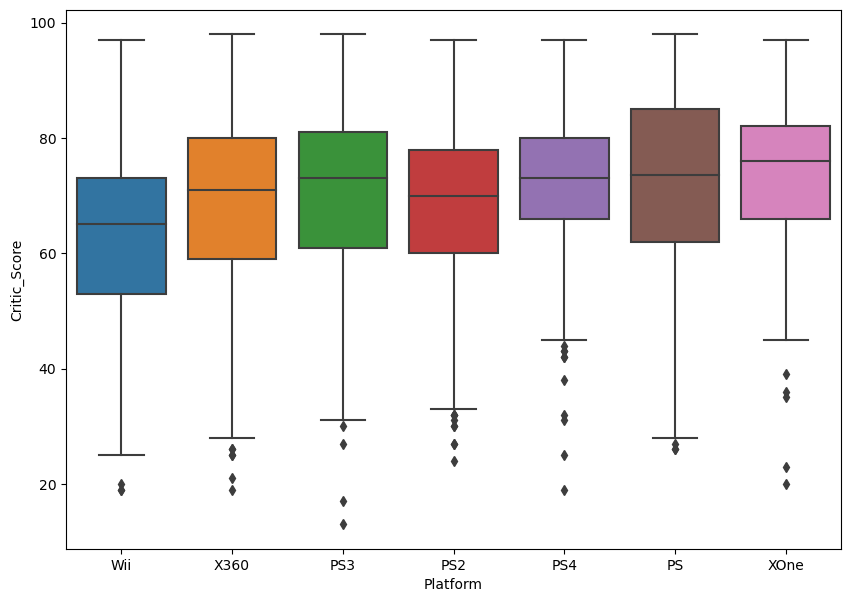

In [21]:
#Boxplot
plt.figure(figsize=(10,7))
sns.boxplot(y = 'Critic_Score', x = 'Platform', data = vg_df)
plt.show()